# Исследоввание рынка видеоигр

Вы работаете в интернет-магазине , который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. 

## Изучение данных из файла и их предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
import seaborn as sns

data = pd.read_csv('/datasets/games.csv')

### Обзор и изучение данных


    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
print('''
Информация о таблице:
      ''')
display(data.info())
print('''
Обзор таблицы:
      ''')
display(data.head(15))
print('Количество дубликатов:', data.duplicated().sum())
print('''
Подсчет пропусков:
      ''')
print(data.isna().sum())# подсчёт пропусков


Информация о таблице:
      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


Обзор таблицы:
      


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Количество дубликатов: 0

Подсчет пропусков:
      
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [3]:
data['User_Score'].value_counts(dropna=False) #по условию задания проверим, сколько значений tbd в столбце с пользовательским рейтингом

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.5       2
1.1       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 97, dtype: int64

Вывод:
- присутствуют пропущеннные значения в столбцах с названиями игр и годами релизов, а также в трех столбцах с рейтингами
- нет дубликатов
- необходимо привести названия столбцов в нижний регистр
- в столбце с пользовательским рейтингом присутствуют значения `tbd`, что означает To Be Determined (будет определено). Скорее всего это игры, которые не набрали достаточное количество оценок для вывода общего рейтинга. Можно заменить эти значения на пустые.
- в столбцах `Year_of_Release`, `User_Score`, `Critic_Score` необходимо заменить типы данных.

### Предобработка данных

In [4]:
#приведем названия столбцов к нижнему регистру и проверим

data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#удалим пустые значения в столбцах 'name', 'genre', 'year_of_release', так как они не влияют на общую картину
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
data['user_score'] = data['user_score'].replace("tbd", np.NaN) 
# заменим значение "tbd" - "to be determined" на NaN

In [7]:
#приведем типы данных к соотвествующему

# Приведем годы и оценки критиков в целочисленный тип
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

# Оценки пользователей приведем к типу float
data['user_score'] = data['user_score'].astype('float')

display(data.info())
display(data.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN


Замечание: Пропуски в столбцах year_of_release , critic_score , user_score , rating оставим незаполненными, поскольку их заполнение может исказить статистику

## Расчеты и добавление результатов в таблицу

In [8]:
# Добавим столбец total_sales с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Кол-во продаж')

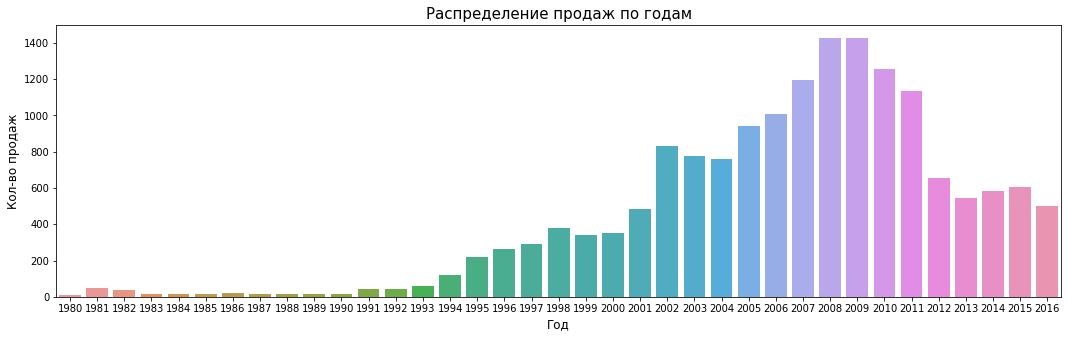

In [9]:
#построим гистограмму распределения продаж по годам
plt.figure(figsize=(18, 5))
sns.countplot(data = data, x='year_of_release')
plt.title('Распределение продаж по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Кол-во продаж',fontsize=12)

Наблюдение: Начало роста в 1994, резкий скачок в выпуске игр заметен в 2002 году. Наибольшее кол-во игр было выпущено в 2008-2009 гг. Заметно снижение объема с начала 2012 года.


### Как менялись продажи по платформам?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Количество продаж')

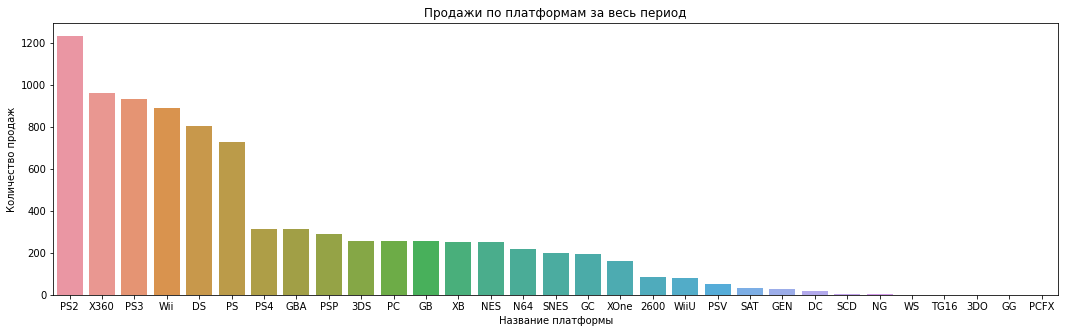

In [10]:
#посмотрим, как распряделяется сумма продаж в зависимости от платформы
sales_on_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(18,5))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Наблюдение: Из гистограммы видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.


In [11]:
#выделим самые прибыльные платформы в отдельный список
top_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

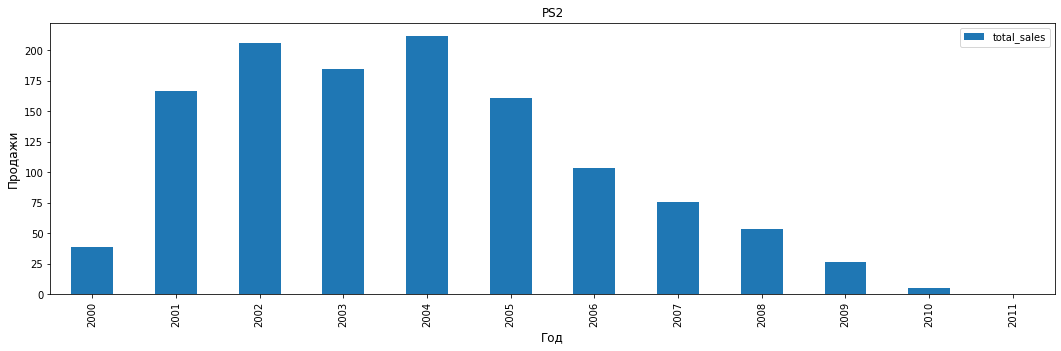

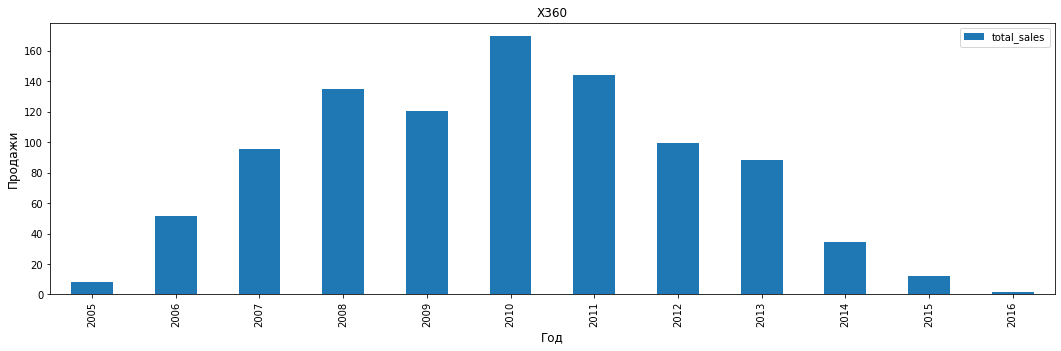

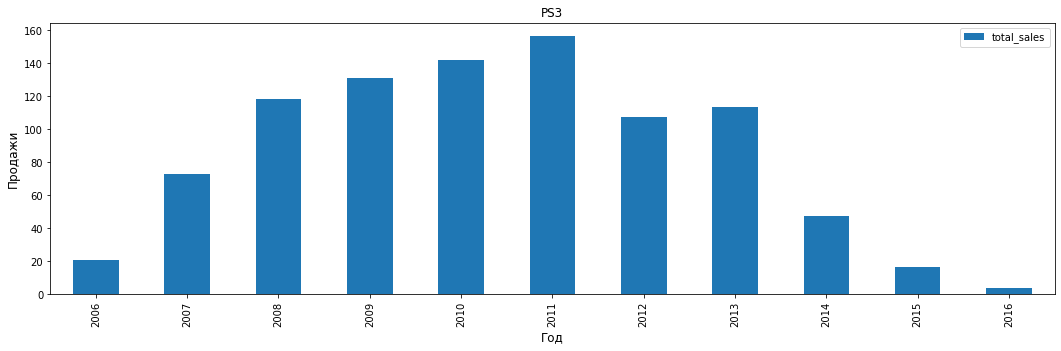

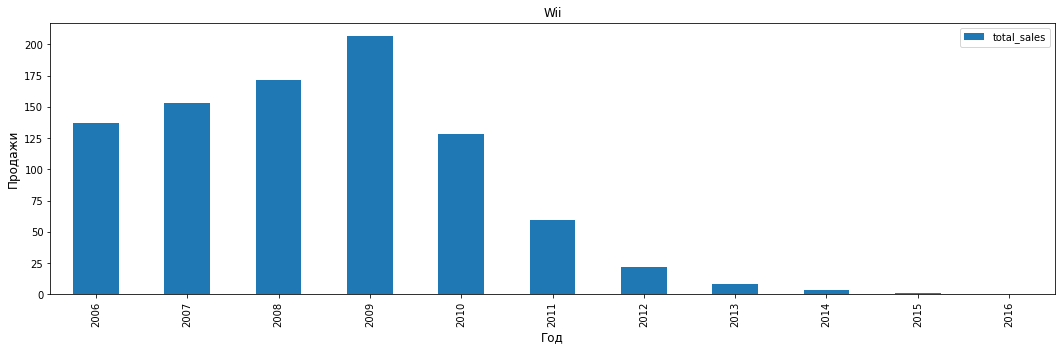

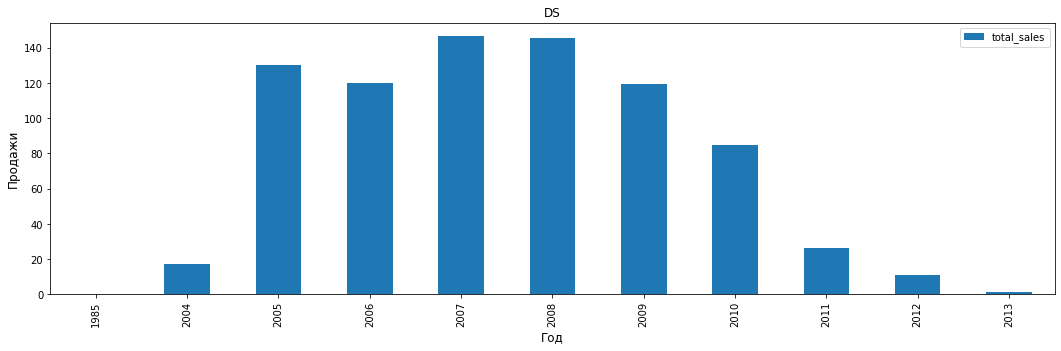

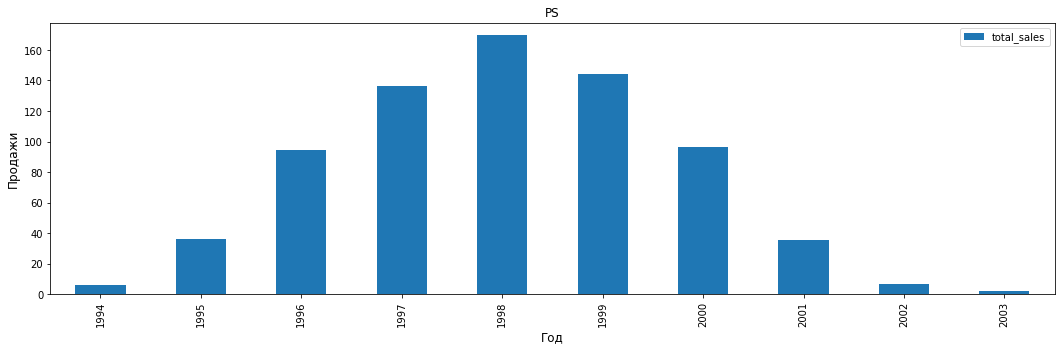

In [12]:
#Построим распределения по годам для каждой платформы с наибольшими продажами
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(18,5))
    plt.title(platform)
    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Продажи',fontsize=12)

Наблюдение: Многие новые платформы появляются в 2006 году (например: Wii, PS3, X360), при этом характерный срок жизни - это 8-10 лет. Таким образом оставим только актульные данные, начиная с 2006 г.

### Выбор потенциально прибыльных платформ

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Продажи')

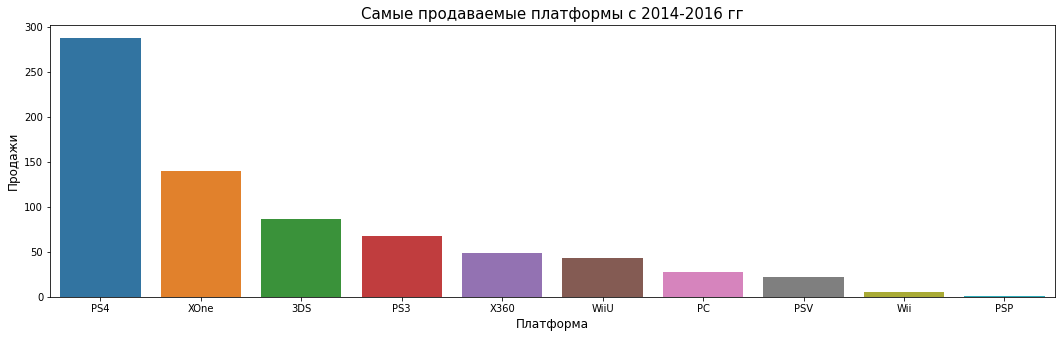

In [13]:
actual_data = data[data['year_of_release'] > 2013] #выделяем датафрейм с данными с 2014 года, в дальнейшем будем работать с ним

#посмотрим, какие платформы самые прибыльные в новом датафрейме
actual_2016_pvt = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016_pvt, x='platform', y='total_sales')
plt.title('Самые продаваемые платформы с 2014-2016 гг', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)



Самые прибыльные платформы на рассматриваемом промежутке - PS4,XOne,3DS

Text(0, 0.5, 'Прибыль')

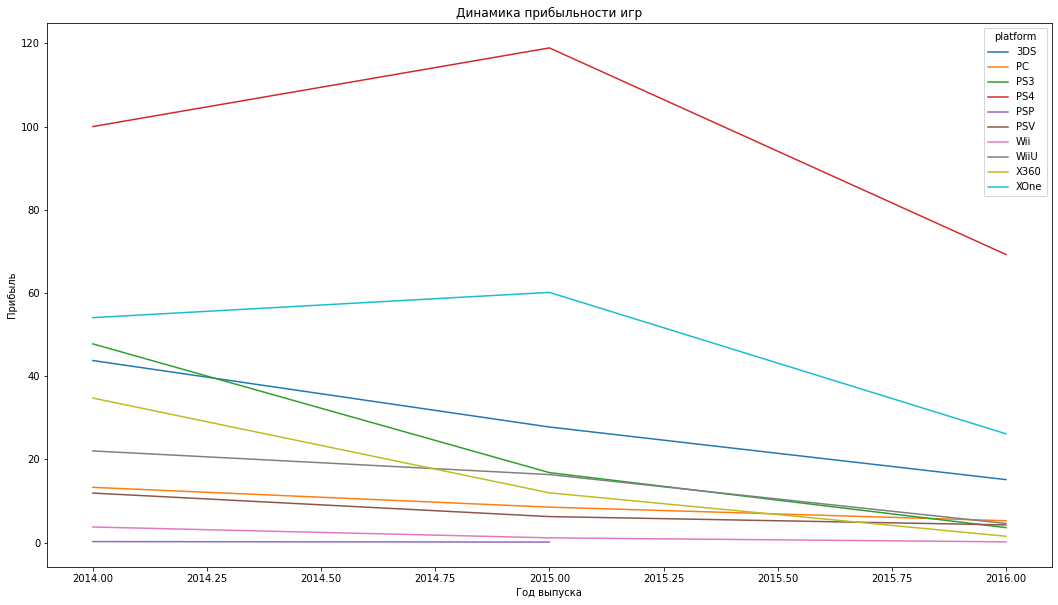

In [14]:
#построим график динамики прибыли платформ
actual_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(18,10))
plt.title("Динамика прибыльности игр")
plt.xlabel("Год выпуска")
plt.ylabel("Прибыль")

В целом продажи по всем платформам падают. С учетом того, что за 2016 год данные неполные, то потенциально прибыльными платформами можно считать:PS4,XOne,3DS. Это подтверждают и данные по общим продажам за период в целом.

### "Ящик с усами"

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Глобальные продажи')

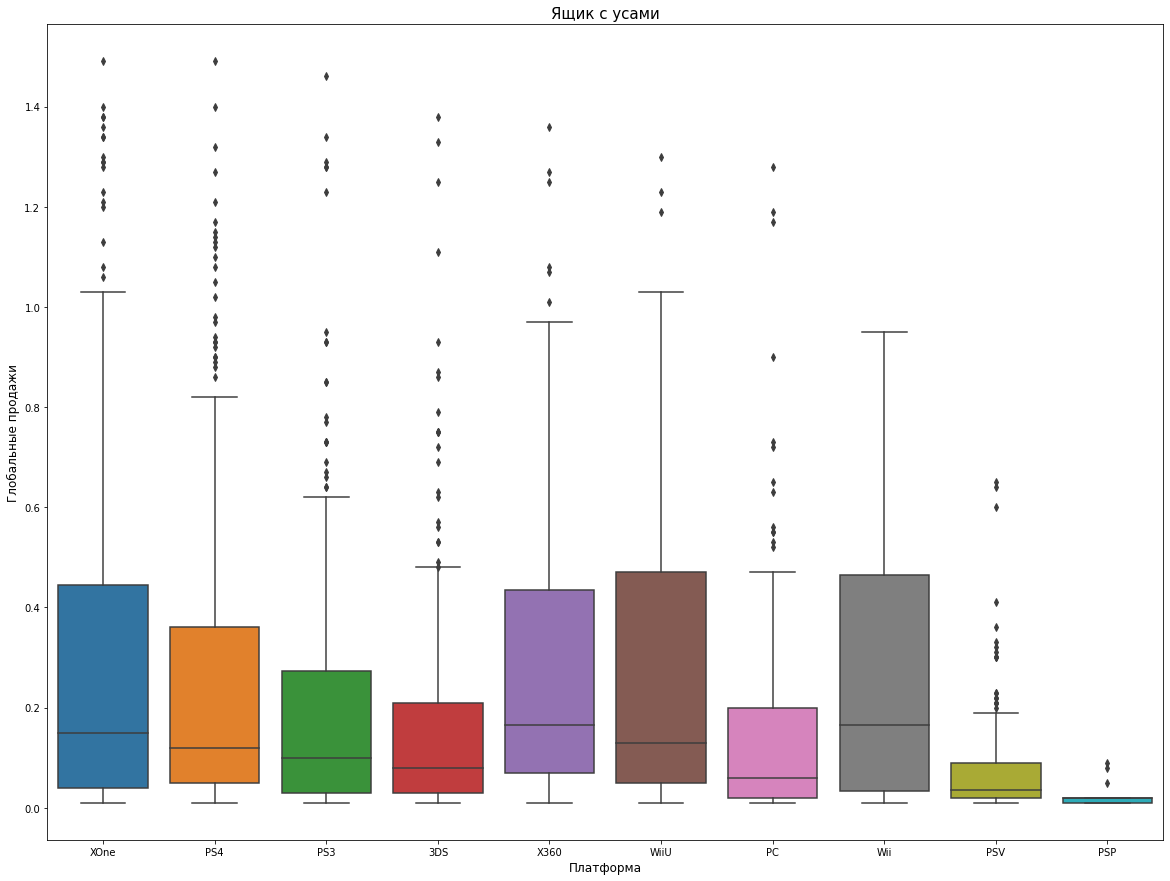

In [15]:
#изобразим на одном графике диаграму размаха для общих продаж по платформ из списка
plt.figure(figsize=(20,15))
sns.boxplot(data=actual_data[actual_data['total_sales'] < 1.5], x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)



In [16]:
#получим числовые характеристики продаж по платформам
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Выводы: 

- У большинства платформ из выборки много выбросов, скорее всего это "всплески" их популярности, когда игры активно покупались.
- Наибольшие медианы по продажам - у платформ X360,Wii,XOne,WiiU
- У трех платформ совсем маленькие продажи - PSP, PSV
- Игры для компьютеров в среднем приносят меньше прибыли, чем консоли

### Диаграмма рассеяния

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Диаграмма рассеяния для PS4


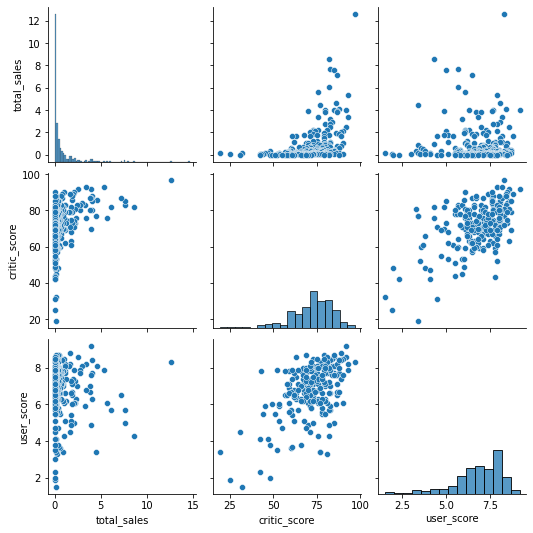

In [17]:
#рассмотрим для начала потенциально прибыльную в 2016 году PS4

print("Диаграмма рассеяния для PS4")
sns.pairplot(actual_data[actual_data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()



Можно заметить некоторую зависимость между высокими оценками критиков и ростом продаж, однако то же про зависимость пользовательских оценок и продажи сказать трудно. Проверим расчеты:

In [18]:
print("Матрица корреляций")
actual_data[actual_data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Видим, что есть средняя корреляция между оценками критиков и прибылью. Зависимость прибыли и пользовательских оценок проактически нет. Соотнесем эти выводы с данными по другим популярным платформам. Возьмем для сравнения PS3, X360 и WiiU, XOne

In [19]:
#Напишем функцию, которая будет считать корреляции для других платформ

def corr_rating(platform_name):
    print('''
    Корреляция для ''', platform_name)
    platform = actual_data[actual_data.platform == platform_name][['total_sales', 'critic_score', 'user_score']].corr()
    #print(platform)
    print()
    print('Корреляция между отзывами критиков и суммарными продажами')
    
    if 0.3 >= platform['critic_score'][0] > 0.1:
        print('Слабая', platform['critic_score'][0])
    if 0.5 >= platform['critic_score'][0] > 0.3:
        print('Умеренная', platform['critic_score'][0])
    if 0.7 >= platform['critic_score'][0] > 0.5:
        print('Средняя', platform['critic_score'][0])
    if 1 >= platform['critic_score'][0] > 0.7:
        print('Сильная', platform['critic_score'][0])
        
    print()
    print('Корреляция между отзывами пользователей и суммарными продажами')
    
    if 0.3 >= platform['user_score'][0] > 0.1:
        print('Слабая', platform['user_score'][0])
    if 0.5 >= platform['user_score'][0] > 0.3:
        print('Умеренная', platform['user_score'][0])
    if 0.7 >= platform['user_score'][0] > 0.5:
        print('Средняя', platform['user_score'][0])
    if 1 >= platform['user_score'][0] > 0.7:
        print('Сильная', platform['user_score'][0])
        
    
    if -0.1 <= platform['user_score'][0] < 0.1:
        print('Не выявлено', platform['user_score'][0])
    if -0.3 <= platform['user_score'][0] < -0.1:
        print('Слабая обратная', platform['user_score'][0])
    if -0.5 <= platform['user_score'][0] < -0.3:
        print('Умеренная обратная', platform['user_score'][0])
    if -0.7 <= platform['user_score'][0] < -0.5:
        print('Средняя обратная', platform['user_score'][0])
    if -1 <= platform['user_score'][0] < -0.7:
        print('Сильная обратная', platform['user_score'][0])


for pltf in ['PS3', 'X360','WiiU', 'XOne'] :
    corr_rating(pltf)


    Корреляция для  PS3

Корреляция между отзывами критиков и суммарными продажами
Умеренная 0.44657460493190787

Корреляция между отзывами пользователей и суммарными продажами
Слабая обратная -0.16676141347662113

    Корреляция для  X360

Корреляция между отзывами критиков и суммарными продажами
Средняя 0.5257228356581524

Корреляция между отзывами пользователей и суммарными продажами
Слабая обратная -0.13844457094566492

    Корреляция для  WiiU

Корреляция между отзывами критиков и суммарными продажами
Умеренная 0.3702014124808842

Корреляция между отзывами пользователей и суммарными продажами
Умеренная 0.40792645792170784

    Корреляция для  XOne

Корреляция между отзывами критиков и суммарными продажами
Умеренная 0.4286769437033328

Корреляция между отзывами пользователей и суммарными продажами
Не выявлено -0.0703839280647589


Вывод: У рассмотренных платформ наблюдается умеренная связь между оценками критиков и продажами. Однако, корреляция продаж и оценок пользователей практически отсутствует (меньше 15 процентов). Исключение составляет платформа WiiU, где взаимосвязь продаж и отзывов пользователей выше, чем с оценками критиков.

Предположим, что отзывы критиков - это часть пиара платформы, и поэтому они напрямую могут влиять на коммерческие показатели игр. 

Отзывы пользователей же даже на самые интересные и прогрессивные игры могут быть субъективными и не отражать реального положения дел. Тем более, чтобы составить своем мнение об игре, пользователю все равно придется купить ее, а значит вклад в прибыльность редко будет зависеть от высокой оценки.

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [20]:
#посмотрим распределение выручки от продаж в зависимости от жанра
genre_total_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre_total_sales


,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


Text(0, 0.5, 'Продажи')

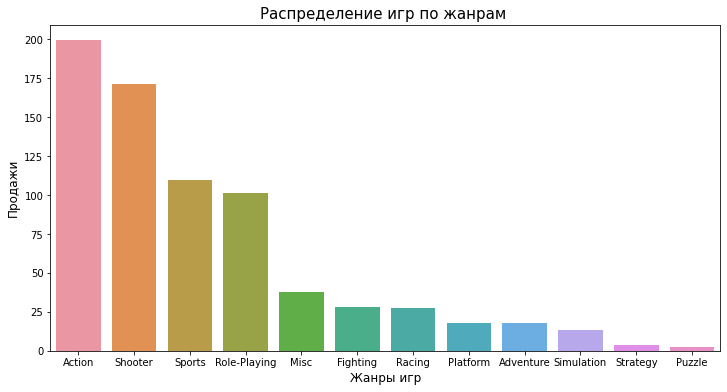

In [21]:
#Отрисуем барплот чтобы наглядно посмотреть как распределяются жанры

plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_total_sales, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)



Самым популярным жанром оказались action-игры, менее популярными жанрами - puzzle и strategy. Большая часть прибыли приходится на 5 жанров: Action, Shooter, Sports, Misc, Role-Playing. Однако, общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Поэтому для поиска наиболее прибыльного жанра построим распределение средней прибыли каждого жанра. Так мы сможем обратить внимание на игры, стабильно приносящие высокий доход, вне зависимости от количества выпущенного.

In [22]:
#посмотрим распределение выручки от продаж в зависимости от жанра
genre_mean_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre_mean_sales

,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322068
8,Simulation,0.298409
9,Puzzle,0.157857


Text(0, 0.5, 'Средние продажи')

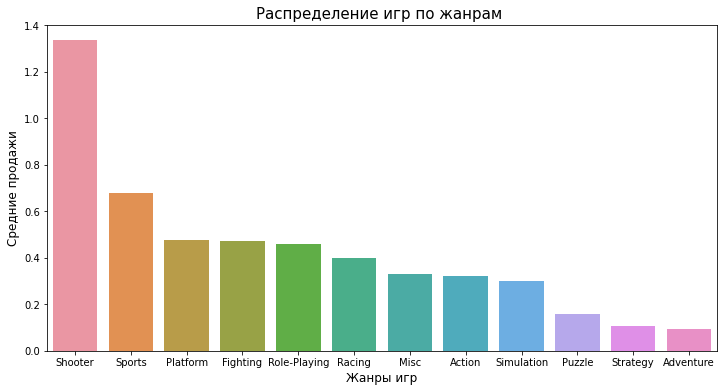

In [23]:
#Отрисуем барплот чтобы наглядно посмотреть как распределяются жанры

plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_mean_sales, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Средние продажи',fontsize=12)

In [24]:
actual_data.groupby("genre")['genre'].count().sort_values() #посмотрим распределение количества игр по жанрам

genre
Puzzle           14
Strategy         37
Platform         38
Simulation       44
Fighting         60
Racing           69
Misc            113
Shooter         128
Sports          161
Adventure       185
Role-Playing    221
Action          619
Name: genre, dtype: int64

Таким образом, мы видим интересную картину: в топе по выручке находятся игры жанра Action, но если мы рассмотрим средние значения выручки, то результат изменится в пользу Shooter. Учитывая тот факт, что игр в жанре Action выпускается значительно больше, чем других (в 1,5-2 раза), а доля количества игр в жанре Shooter всего лишь 8%, то шутеры выглядят более стабильно прибыльным жанром.

Таким образом, самым прибыльными жанрами отметим Shooter и Sports.

Интересно, что жанр Adventure сильно отстаёт по продажам, хотя игр выпускается много

## Портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5), влияние рейтинга ESRB на продажи.

In [25]:
display(actual_data['rating'].value_counts(dropna=False)) #проверим сколько игр без рейтинга возраста
actual_data['rating'] = actual_data['rating'].fillna(value = 'Empty') #заполним их словом Empty
display(actual_data['rating'].value_counts()) #проверим

NaN     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

/tmp/ipykernel_265/2348549755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['rating'] = actual_data['rating'].fillna(value = 'Empty') #заполним их словом Empty


Empty    749
T        271
M        265
E        219
E10+     185
Name: rating, dtype: int64


Портрет по критерию platform



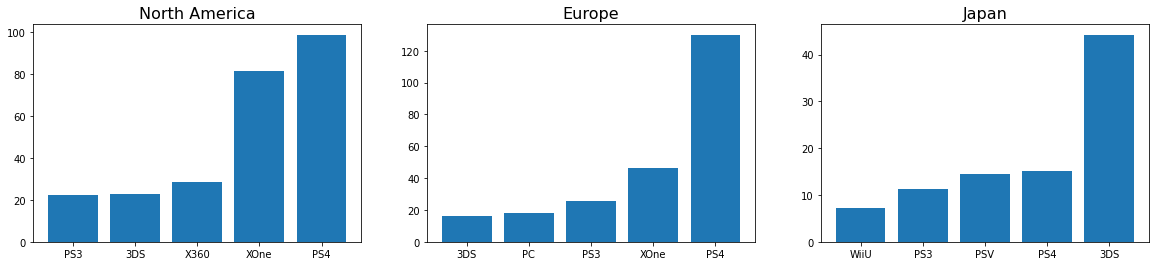


Портрет по критерию genre



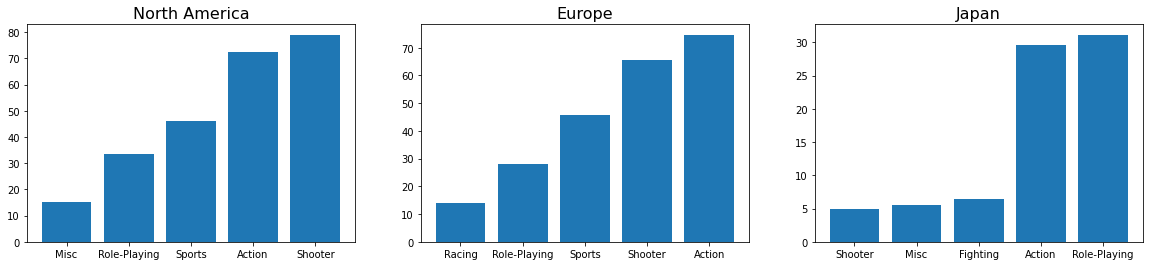


Портрет по критерию rating



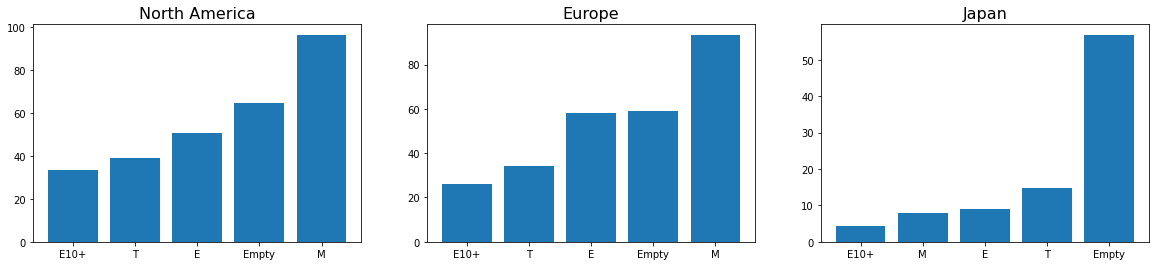

In [26]:
#построим гистограмы топ-5 самых популярных платформ и жанров, 
# а также построим гистограммы распределения продаж в зависимости от возрастного рейтинга игр

for criteria in ['platform', 'genre', 'rating']:
    print()
    print('Портрет по критерию', criteria)
    print()
    #NA
    na_platform_index = actual_data.groupby(criteria)['na_sales'].sum().sort_values()[-5:].index.tolist()
    na_platform_values = actual_data.groupby(criteria)['na_sales'].sum().sort_values()[-5:]

    #EU
    eu_platform_index = actual_data.groupby(criteria)['eu_sales'].sum().sort_values()[-5:].index.tolist()
    eu_platform_values = actual_data.groupby(criteria)['eu_sales'].sum().sort_values()[-5:]

    #JP
    jp_platform_index = actual_data.groupby(criteria)['jp_sales'].sum().sort_values()[-5:].index.tolist()
    jp_platform_values = actual_data.groupby(criteria)['jp_sales'].sum().sort_values()[-5:]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

    ax1.bar(na_platform_index, na_platform_values)
    ax1.set_title("North America", fontsize=16)

    ax2.bar(eu_platform_index, eu_platform_values)
    ax2.set_title("Europe", fontsize=16)

    ax3.bar(jp_platform_index, jp_platform_values)
    ax3.set_title("Japan", fontsize=16)

    plt.show()


Самые популярные игровые платформы в Северной Америке это: PS4 и XOne. Топ 5 жанров в северной америке : shooter, action, sports, role-playing. По рейтингам видно, что больше всего продаж у игр с рейтингом "для взрослых", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "для всех".

Лидер среди платформ в Европе PS4. Популярные жанры игр - те же, что и в Америке. По возрастным рейтингам картина повторяет распределение в Америке.

Самая популярная игровая платформа в Японии - это 3DS, доля остальных платформ равномерно распределена между другими платформами. Топ жанров в Японии : Role-Playing и action, на остальные жанры приходится меньшая часть. По рейтингам видно, что больше всего продаж у игр без рейтинга.

В Европейских странах и Америке в лидерах платформа PS4, на втором месте XOne. Японцы предпочитают пользоваться играми отечественного производства, а абсолютным лидером рейтинга является платформа 3DS.

Предпочтения европейских и американских пользователей в выборе жанра практически не различаются, в то время как у японцев в топе "непопулярный" на западе Role-playing, а шутеры находятся на пятом месте. 

Большую часть в распределении возрастных рейтингов в Японии занимают игры без рейтинга. Возможно это связано с тем, что эти оценки (рейтинги) выставляет именно Американское рейтинговое агентство, которое элементарно исключает из оценки игры Японского производства, непопулярные в США.

## Проверка гипотез

### Гипотеза 1

Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var) . Используем его. Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем. Примем, что пороговое значение равно 15%

In [27]:
#зададим две выборки с рейтингами платформ, предварительно удалив пропуски, чтобы они не влияли на конечный результат

xone = actual_data[actual_data['platform']=="XOne"]['user_score'].dropna()
pc = actual_data[actual_data['platform']=="PC"]['user_score'].dropna()

In [28]:
alpha = 0.15
 
results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.10450507919348415
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.


Вывод: Малое значение p-value говорит нам о том, вероятность случайного совпадения средних выборок мала. Нулевая гипотеза отвергается.

А значит альтернативная гипотеза о том, что средние выборок отличаются, не отвергается.

### Гипотеза 2

Проверим гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние оценки пользователей жанров Action и Sports равны;
Альтернативная гипотеза H₁: Cредние оценки пользователей жанров Action и Sports различаются.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var) . Используем его. Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем. Примем, что пороговое значение равно 10%

In [29]:
#зададим две выборки с рейтингами жанров, предварительно удалив пропуски, чтобы они не влияли на конечный результат

action = actual_data[actual_data['genre']=="Action"]['user_score'].dropna()
sports = actual_data[actual_data['genre']=="Sports"]['user_score'].dropna()

In [30]:
alpha = 0.1
 
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Cредние оценки пользователей жанров Action и Sports различаются.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу. Cредние оценки пользователей жанров Action и Sports различаются.


Мы получили достаточно большое значение p, а значит оценки пользователей игр жанров Action и Sports можно считать разными. Гипотеза подтверилась!


## Вывод

Мы изучили данные о продаже игр на различных платформах в 2006-2016 годах, приняв этот временной промежуток как актуальный и наиболее подходящий для анализа. Нашей задачей было выяснить определяющие успешность игры закономерности. 

Изучив различные критерии, мы можем сделать выводы:

- средний "срок жизни" платформы - 8-10 лет, следует выбирать для приоритетной продажи те платформы, которые на середине этого срока
- Самые прибыльные платформы на рассматриваемом промежутке - PS4,XOne,3DS
- У трех платформ совсем маленькие продажи - PSP, PSV
- Игры для компьютеров в среднем приносят меньше прибыли, чем консоли
- У рассмотренных платформ наблюдается умеренная связь между оценками критиков и продажами. 
- Однако, корреляция продаж и оценок пользователей практически отсутствует (меньше 15 процентов). Исключение составляет платформа WiiU, где взаимосвязь продаж и отзывов пользователей выше, чем с оценками критиков.
- топе по выручке находятся игры жанра Action, но если мы рассмотрим средние значения выручки, то результат изменится в пользу Shooter. Таким образом, самым прибыльными жанрами отметим Shooter и Sports.
- Интересно, что жанр Adventure сильно отстаёт по продажам, хотя игр выпускается много
- В Европейских странах и Америке в лидерах платформа PS4, на втором месте XOne. Японцы предпочитают пользоваться играми отечественного производства, а абсолютным лидером рейтинга является платформа 3DS.
- Топ 5 жанров в северной америке : shooter, action, sports, role-playing. Предпочтения европейских и американских пользователей в выборе жанра практически не различаются, в то время как у японцев в топе "непопулярный" на западе Role-playing, а шутеры находятся на пятом месте.
- Большую часть в распределении возрастных рейтингов в Японии занимают игры без рейтинга. Возможно это связано с тем, что эти оценки (рейтинги) выставляет именно Американское рейтинговое агентство, которое элементарно исключает из оценки игры Японского производства, непопулярные в США.
-Игрв без рейтинга также занимают крупную долю в продажах в США и ЕС, следует детельнее изучить эти игры, чтобы использовать эту информацию при планировании продаж.
- Статистически проверено, что средние пользовательские рейтинги платформ Xbox One и PC и средние оценки пользователей игр жанров Action и Sports можно считать разными


Данные факты, а также приведенные в проекте рассуждения можно использовать для планирования маркетинговых активностей и рекламных кампаний магазина. В зависимости от востребованности и прибыльности жанра, платформы игры, а также региона ее продажи, можно менять продуктовую линейку и предложения для пользователей.
